In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [4]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [5]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [6]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [7]:
df_train.head(4)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1.0,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake


In [8]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [9]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [10]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [11]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)

/tmp/ipykernel_461/2578188673.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)


In [12]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


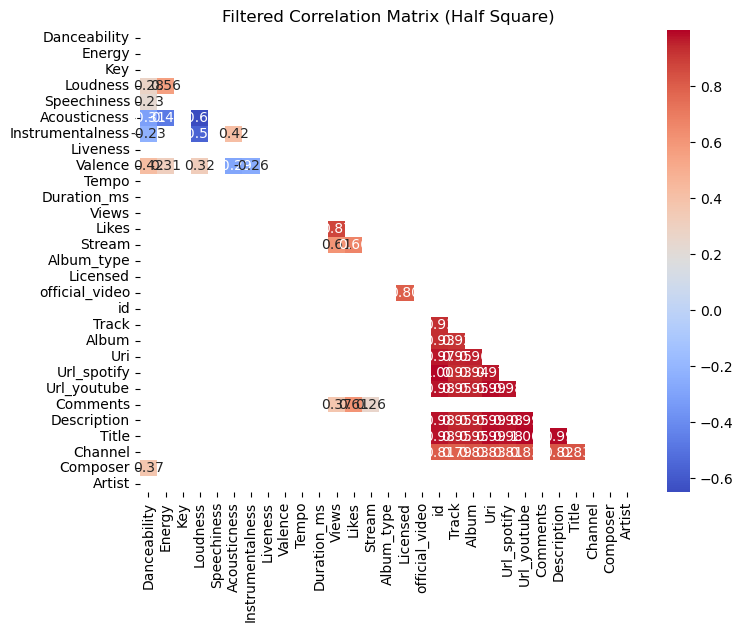

In [13]:
corr_matrix_with_threshold(df_train_embedding, 0.2)

In [14]:
def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [15]:
arr_NOT_important_column = ['Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important = remove_unimportant_column(df_train_embedding, arr_NOT_important_column)
df_test_embedding_important = remove_unimportant_column(df_test_embedding, arr_NOT_important_column)

In [16]:
df_train_embedding_important

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Track,Comments,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,7.241508e-01,0.000062,0.000807,0.3400,83.398,117907.0,NaN,137622.0,19981370.0,0.0,NaN,3070.0,0.0,NaN,0.0
1,0.0,0.184220,7.0,NaN,NaN,6.722214e-01,0.910000,0.034966,0.7460,148.692,173427.0,184825.0,5190.0,NaN,NaN,1.0,122.0,1.0,1.0,1.0
2,0.0,NaN,6.0,-15.596,NaN,6.676276e-01,0.867000,0.001772,0.3800,84.899,150667.0,184825.0,5190.0,19320810.0,NaN,2.0,122.0,1.0,1.0,2.0
3,1.0,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,265000.0,202457327.0,997035.0,399661898.0,0.0,3.0,24350.0,2.0,2.0,3.0
4,4.0,NaN,5.0,NaN,0.0260,3.048625e-06,0.000467,0.002924,0.2950,97.997,263867.0,316688049.0,1299086.0,NaN,0.0,4.0,31150.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,-6.344,0.0328,8.991539e-02,0.000000,0.000591,0.6580,90.002,94667.0,NaN,1113.0,NaN,NaN,12972.0,0.0,5190.0,1.0,50.0
17166,2.0,0.820026,4.0,-1.786,NaN,2.195200e-05,0.000000,0.000786,0.6570,174.869,150857.0,164741.0,2019.0,10898176.0,2.0,12973.0,0.0,5190.0,3.0,36.0
17167,1.0,0.571787,4.0,-4.679,0.0647,NaN,0.000000,0.003652,0.4190,168.388,136842.0,35646.0,329.0,NaN,2.0,12974.0,0.0,NaN,4.0,NaN
17168,1.0,0.451218,9.0,NaN,0.4190,4.511802e-02,NaN,0.001260,0.5390,155.378,108387.0,6533.0,NaN,6873961.0,2.0,12975.0,0.0,5190.0,1.0,70.0


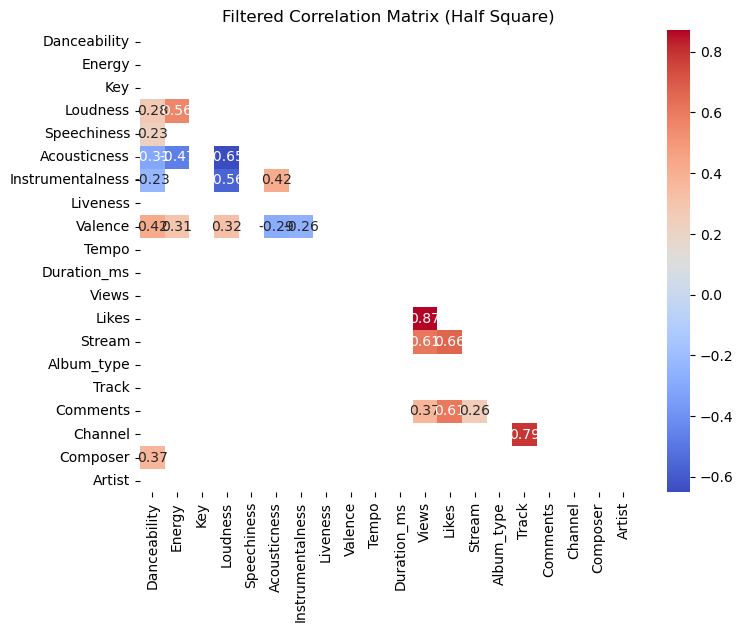

In [17]:
corr_matrix_with_threshold(df_train_embedding_important, 0.2)

* Danceability ==> Valence: 0.424102 | Composer: 0.295219| Loudness: 0.275222 | Speechiness:0.228473|  Acousticness:-0.309605| Instrumentalness: -0.231177 | Likes: 0.103480| 
* Valence      ==> Loudness: 0.319542  |  Energy: 0.305514  |  Acousticness: -0.288254  | Instrumentalness: -0.258984  | Composer: 0.143226
* Composer     ==> Valence: 0.143226 | 
* Loudness     ==> Energy: 0.559834 | Valence: 0.319542 |Tempo: 0.146088	| Acousticness: -0.651000 |Instrumentalness: -0.563593 |  Views: 0.110302 | Likes: 0.123328 | Stream: 0.112378
* Speechiness  ==> Acousticness: -0.141015 |Instrumentalness: -0.113436
* Acousticness ==> Energy: -0.471571 | Loudness: -0.651000 |Instrumentalness: 0.416931| Energy: -0.471571 | Tempo: -0.127284
* Instrumentalness ==> Energy: -0.135264 | Loudness: -0.563593| Acousticness: 0.416931| Valence: -0.258984
* Likes ==> Views: 0.871248 |Stream: 0.664720 |Comments: 0.609587| Loudness:0.123328

In [18]:
arr_NOT_important_column = [ 'Tempo', 'Likes', 'Stream', 'Energy', 'Views', 'Track', 'Key', 'Liveness', 'Duration_ms',  'Album_type', 'Comments','Channel','Artist'  ]
df_train_embedding_important_simple = remove_unimportant_column(df_train_embedding_important, arr_NOT_important_column)
df_test_embedding_important_simple = remove_unimportant_column(df_test_embedding_important, arr_NOT_important_column)

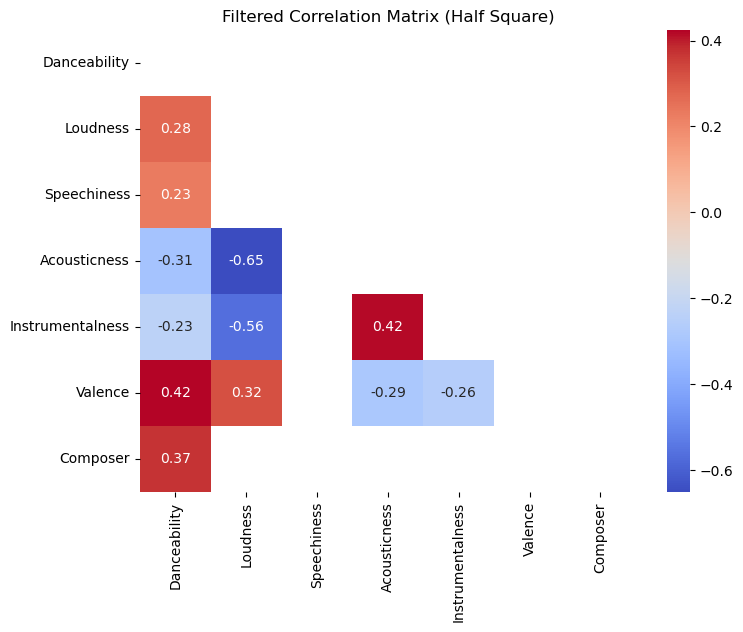

In [19]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.2)

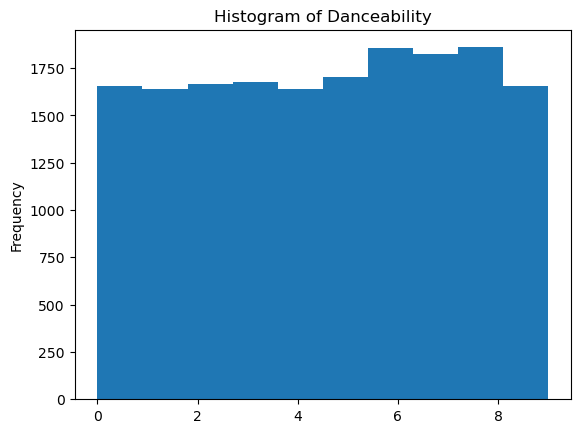

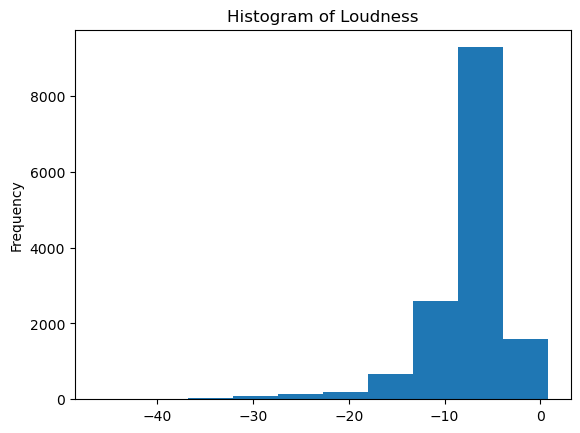

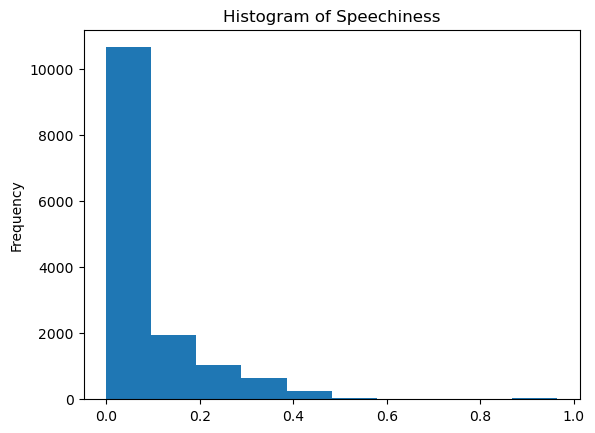

In [20]:
import matplotlib.pyplot as plt
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
plot_hist(df_train_embedding_important_simple, 'Danceability')
plot_hist(df_train_embedding_important_simple, 'Loudness')
plot_hist(df_train_embedding_important_simple, 'Speechiness')


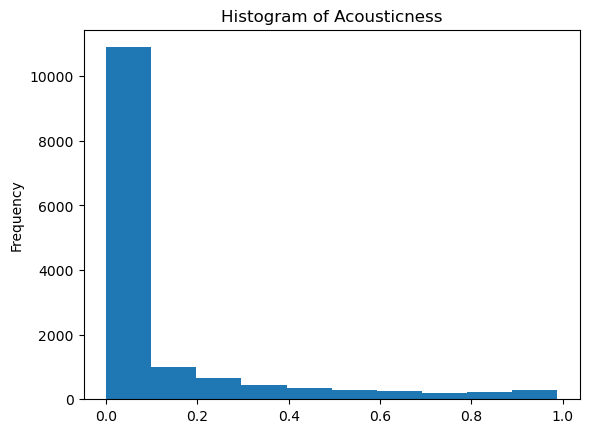

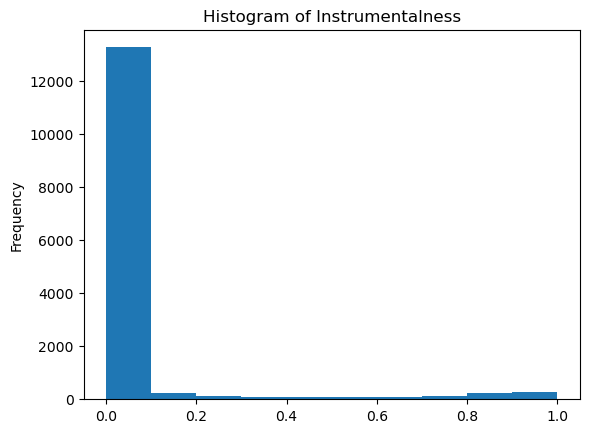

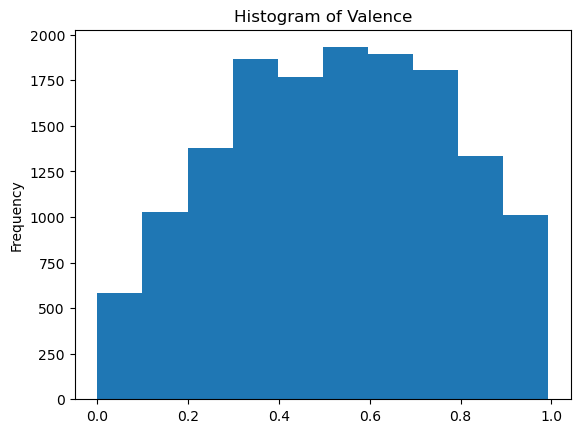

In [21]:
plot_hist(df_train_embedding_important_simple, 'Acousticness')
plot_hist(df_train_embedding_important_simple, 'Instrumentalness')
plot_hist(df_train_embedding_important_simple, 'Valence')


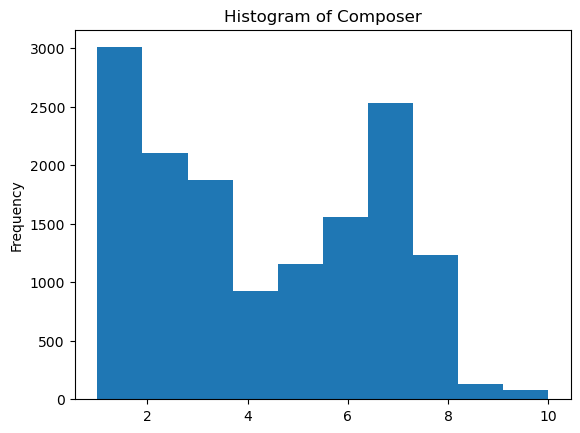

In [22]:
# plot_hist(df_train_embedding_important_simple, 'Likes')
# plot_hist(df_train_embedding_important_simple, 'Stream')
plot_hist(df_train_embedding_important_simple, 'Composer')

In [23]:
min(df_train_embedding_important_simple['Loudness'].values)

-46.251

In [24]:
max(df_train_embedding_important_simple['Loudness'].values)

0.829

In [25]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_train_embedding_important_simple.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_train_embedding_important_simple) - len(df_with_clean_data))

# Make the clean data to give strength to the dataset
# duplicate 2x to the data training
# so it should dominate the dataset

df_train_embedding_important_simple_added = pd.concat([
    df_train_embedding_important_simple, 
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
]).sample(frac=1).reset_index(drop=True)

print("After merging Clean data with distorted data:", len(df_train_embedding_important_simple_added))

Clean Data without NaN: 6574
Data with NaN: 10596
After merging Clean data with distorted data: 56614


In [26]:
def conditioning(df):
    df_ret = df.copy()
    df_ret['Stream'] = np.log(df_ret['Stream'])
    df_ret[df_ret['Stream'] == -np.inf] = 0

    df_ret['Likes'] = np.log(df_ret['Likes'])
    df_ret[df_ret['Likes'] == -np.inf] = 0

    df_ret['Instrumentalness'] = np.log(np.abs(df_ret['Instrumentalness']))
    df_ret[df_ret['Instrumentalness'] == -np.inf] = 0

    df_ret['Loudness'] = np.log(np.abs(df_ret['Loudness']))
    df_ret[df_ret['Loudness'] == -np.inf] = 0
    
    df_ret['Acousticness'] = np.log(np.abs(df_ret['Acousticness']))
    df_ret[df_ret['Acousticness'] == -np.inf] = 0
    
    return df_ret

# df_train_embedding_important_simple_added_conditioning = conditioning(df_train_embedding_important_simple_added)
# df_test_embedding_important_simple_added_conditioning = conditioning(df_test_embedding_important_simple)

df_train_embedding_important_simple_added_conditioning = df_train_embedding_important_simple_added
df_test_embedding_important_simple_added_conditioning = df_test_embedding_important_simple

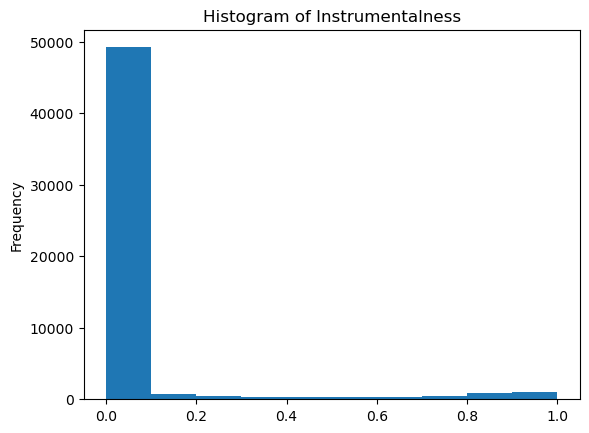

In [27]:
plot_hist(df_train_embedding_important_simple_added_conditioning, 'Instrumentalness')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Likes')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Stream')


In [28]:
def imputer(df):
    df_ret = df.copy()
    mean_values =  df['Valence'].mean()
    df_ret['Valence'] = df['Valence'].fillna(mean_values)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Speechiness'].mean()
    df_ret['Speechiness'] = df['Speechiness'].fillna(mean_values)
    
    mean_values = df['Acousticness'].mean()
    df_ret['Acousticness'] = df['Acousticness'].fillna(mean_values) #0.000000000001)
    
    mean_values = df['Instrumentalness'].mean()
    df_ret['Instrumentalness'] = df['Instrumentalness'].fillna(mean_values)

    df_ret['Composer'] = df['Composer'].fillna(0)

    return df_ret


df_train_embedding_important_simple_imputer_before_scaler = imputer(df_train_embedding_important_simple_added_conditioning)    
df_test_embedding_important_simple_imputer_before_scaler = imputer(df_test_embedding_important_simple_added_conditioning)    


In [29]:
from sklearn.preprocessing import StandardScaler

def scaler(df_train, df_test):
    df_train_non_y = df_train.iloc[:, 1:]
    df_train_y = df_train.iloc[:, :1]
    len_train = len(df_train_non_y)
    print(len_train)
    df_concatenated = pd.concat([
        df_train_non_y, df_test
    ]).reset_index(drop=True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_concatenated)
    df_train_scaled_non_y = pd.DataFrame(X_scaled[:len_train,:], columns=df_concatenated.columns)
    df_train_scaled_with_y = pd.concat([df_train_y, df_train_scaled_non_y], axis=1)
    df_test_scaled = pd.DataFrame(X_scaled[len_train:,:], columns=df_concatenated.columns)
    return df_train_scaled_with_y, df_test_scaled
df_train_embedding_important_simple_imputer, df_test_embedding_important_simple_imputer = scaler(df_train_embedding_important_simple_imputer_before_scaler, df_test_embedding_important_simple_imputer_before_scaler)

56614


In [30]:
print(df_train_embedding_important_simple_imputer_before_scaler)
print(df_train_embedding_important_simple_imputer)

       Danceability  Loudness  Speechiness  Acousticness  Instrumentalness  \
0               3.0    -3.870     0.047800  5.738562e-10          0.000003   
1               5.0   -10.974     0.094527  4.782118e-01          0.056427   
2               0.0   -24.934     0.115000  2.102458e-02          0.898000   
3               8.0    -3.023     0.056700  2.865262e-02          0.000000   
4               8.0    -5.075     0.041300  6.741914e-02          0.000000   
...             ...       ...          ...           ...               ...   
56609           6.0   -15.985     0.049800  2.593434e-02          0.000174   
56610           1.0    -7.924     0.030000  8.871654e-02          0.976000   
56611           7.0    -6.345     0.045500  1.205538e-01          0.000001   
56612           1.0    -2.665     0.047200  3.692604e-05          0.000000   
56613           0.0   -10.541     0.094527  1.643032e-03          0.000000   

       Valence  Composer  
0      0.17800       0.0  
1      0.

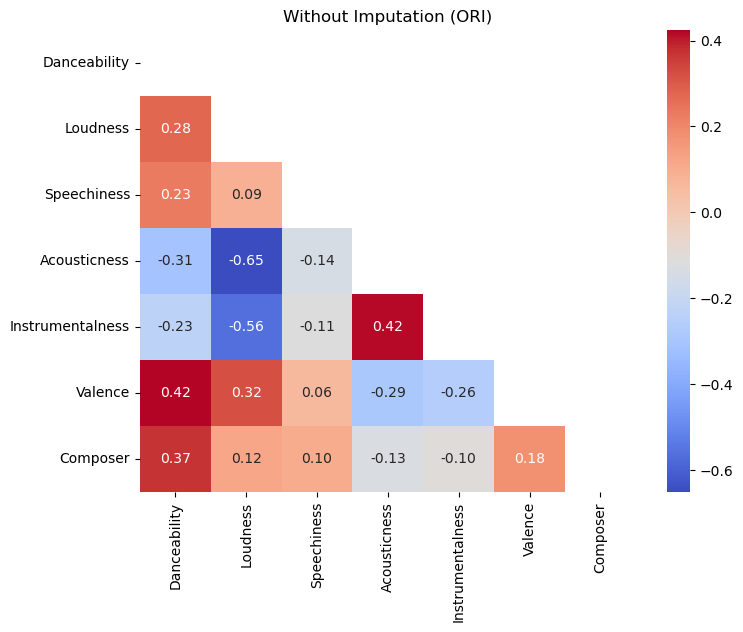

In [31]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01, 'Without Imputation (ORI)')


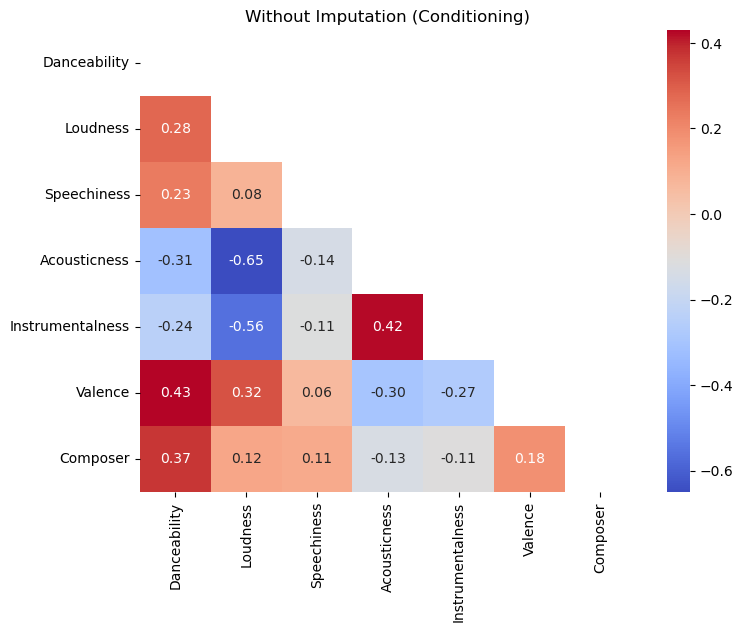

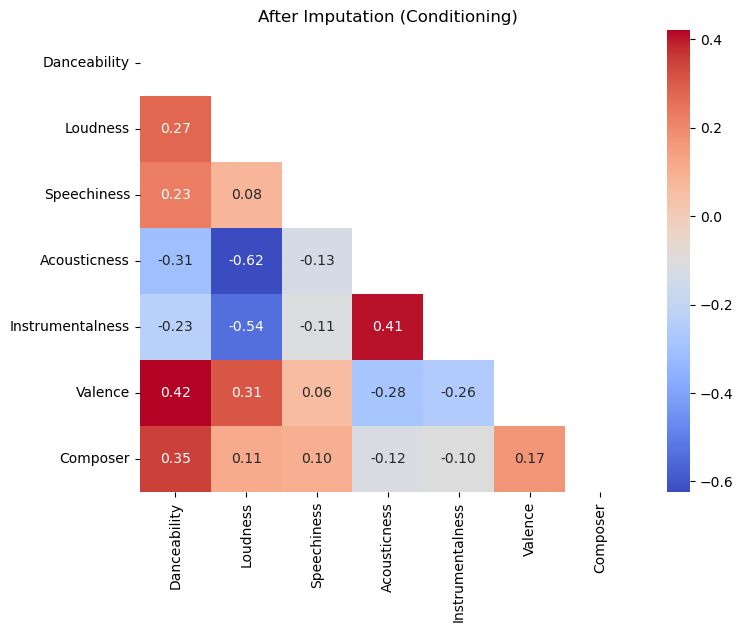

In [32]:
corr_matrix_with_threshold(df_train_embedding_important_simple_added_conditioning, 0.01, 'Without Imputation (Conditioning)')
corr_matrix_with_threshold(df_train_embedding_important_simple_imputer, 0.01, 'After Imputation (Conditioning)')

In [33]:
from sklearn.model_selection import train_test_split
# train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [34]:
train_features

,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Composer
604,-0.027235,1.801970,-0.545768,-0.322073,-0.211390,-1.120826
6134,0.850236,0.139425,-0.543934,-0.322073,1.096312,-1.120826
324,0.019248,-0.440954,-0.437092,-0.322073,-0.762222,-0.741303
48353,0.490122,-0.508463,-0.470468,-0.322073,-1.262597,1.156312
26496,0.236029,-0.150764,-0.017744,-0.322035,0.015430,0.776789
...,...,...,...,...,...,...
54343,0.344958,-0.457076,1.080325,-0.322073,1.701808,0.776789
38158,0.019248,2.245315,-0.493460,-0.322067,0.015430,1.535835
860,-0.312642,0.713759,-0.494845,-0.310742,0.528660,-1.500349
15795,0.612919,-0.500403,-0.545873,-0.322053,-0.661306,-1.120826


In [35]:
train_labels

,Danceability
604,2.0
6134,6.0
324,8.0
48353,4.0
26496,8.0
...,...
54343,7.0
38158,8.0
860,6.0
15795,6.0


In [36]:
val_features

,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Composer
38576,0.019248,0.703683,-0.017744,-0.030104,-0.316510,-0.741303
31038,0.504437,-0.513501,-0.545875,3.879427,0.537070,-0.361780
8500,0.098470,0.461858,-0.017744,-0.322073,-1.708309,-1.120826
5073,-0.004196,3.404058,-0.360181,-0.322061,-0.707560,-1.120826
10289,-0.762226,1.610525,-0.071159,-0.322053,-0.459475,-1.120826
...,...,...,...,...,...,...
7976,0.630365,-0.658596,-0.543581,-0.322073,0.688444,1.156312
22775,0.019248,0.139425,-0.017744,-0.322073,1.096312,1.535835
10838,-0.887259,-0.006405,3.167466,-0.322058,-0.539366,0.397266
2582,0.858512,-0.606201,-0.540992,-0.322073,-0.682331,-1.120826


In [37]:
val_labels

,Danceability
38576,6.0
31038,6.0
8500,4.0
5073,4.0
10289,1.0
...,...
7976,6.0
22775,6.0
10838,1.0
2582,3.0


# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [38]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [39]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


import pickle
# scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor


In [65]:
result_table


,mae,accuracy
regressors,,
OneVsOneClassifier,1.974742,0.283405
KNeighborsClassifier,0.476552,0.846684
SVC,1.384085,0.497660
RandomForestClassifier,2.286938,0.249227
AdaBoostClassifier,2.186788,0.234655
LGBWrapper,1.555683,0.192352
RandomForestRegressor,0.341782,0.844476
RandomForestRegressor,0.341429,0.843681
XGBRegressor,1.729665,0.174335


In [64]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.46294170174767196


In [43]:
# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        df_train_embedding_important_simple_imputer.iloc[:, 1:],                # Full X data
        np.ravel(df_train_embedding_important_simple_imputer.iloc[:, :1])       # Full Y label
    )

Processing Regressor: OneVsOneClassifier
Processing Regressor: KNeighborsClassifier
Processing Regressor: SVC
Processing Regressor: RandomForestClassifier
Processing Regressor: AdaBoostClassifier


In [44]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [45]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [46]:
np.rint(predictionsTest)

array([8., 4., 2., ..., 0., 6., 6.])

# Start Cascade Level 1.5 (just re-train using "cheat from submission")

In [47]:
df_hasil = pd.DataFrame()

tmp = pd.read_csv('old1.csv')
tmp = tmp.drop('id', axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)


In [48]:

for t in range(2,8):
    tmp = pd.read_csv('old'+ str(t) +'.csv')
    tmp = tmp.drop('id', axis=1)
    df_hasil = pd.concat([df_hasil, tmp], axis=1)

# print(df_hasil)
label_test = df_hasil.mean(axis=1)

tmp_danceability = pd.DataFrame(np.rint(label_test), columns=['Danceability'])
concat_cheat = pd.concat([tmp_danceability, df_test_embedding_important_simple_imputer ], axis=1)



In [49]:
pd_new_generated = pd.concat([df_train_embedding_important_simple_imputer, concat_cheat, concat_cheat])
pd_new_generated = pd_new_generated.sample(frac=1).reset_index(drop=True)
pd_new_generated

,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Composer
0,6.0,-0.373034,-0.006405,0.257931,-0.322073,0.801974,-0.361780
1,5.0,-1.120327,-0.554813,0.159071,-0.322073,0.103973,1.156312
2,6.0,0.163782,-0.645497,-0.545592,-0.322033,1.474747,0.397266
3,2.0,1.245467,-0.338179,-0.545872,-0.322073,0.591733,0.776789
4,6.0,0.486767,-0.647513,-0.545832,-0.322009,0.516046,1.535835
...,...,...,...,...,...,...,...
69239,4.0,-0.560920,1.076496,-0.545875,-0.322073,-0.190366,1.156312
69240,4.0,0.345853,-0.629376,-0.545875,-0.322067,1.638735,0.776789
69241,0.0,-2.108069,-0.569927,-0.014376,4.427899,-1.641032,-1.120826
69242,0.0,-0.293630,-0.687817,0.801287,-0.321791,-0.736993,1.156312


In [50]:
# Train using Full Training dataset + slight-cheating majority from previous submission
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(pd_new_generated.iloc[:, 1:], np.ravel(pd_new_generated.iloc[:, :1]))    
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)


Processing Regressor: OneVsOneClassifier
Processing Regressor: KNeighborsClassifier
Processing Regressor: SVC
Processing Regressor: RandomForestClassifier
Processing Regressor: AdaBoostClassifier


,mae,accuracy
regressors,,
KNeighborsClassifier,0.342930,0.889870
SVC,1.172481,0.555948
OneVsOneClassifier,1.908946,0.270070
RandomForestClassifier,1.968825,0.231829
AdaBoostClassifier,2.077100,0.228738


In [58]:
result_table

,mae,accuracy
regressors,,
OneVsOneClassifier,1.908946,0.270070
KNeighborsClassifier,0.342930,0.889870
SVC,1.172481,0.555948
RandomForestClassifier,1.968825,0.231829
AdaBoostClassifier,2.077100,0.228738


In [59]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.4352910006182107


In [52]:
# Make ensemble predictions
ensemble_predictions_l2, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [53]:
current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l2
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1.5_cascade_' + datetime_string + '.csv', index=False)

In [ ]:
all_predictions.shape

# Start Cascade Level 2
## Main Feature: Key, Loudness, Tempo

## NB: This part still on progress

In [ ]:
arr_NOT_important_column_l2 = [ 'Energy', 'Valence', 'Album_type', 'Track', 'Comments', 'Channel', 'Composer', 'Artist', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important_l2 = remove_unimportant_column(df_train_embedding, arr_NOT_important_column_l2)
df_test_embedding_important_l2 = remove_unimportant_column(df_test_embedding, arr_NOT_important_column_l2)
df_train_embedding_important_l2

In [ ]:
df_train_embedding_important_l2_clean = df_train_embedding_important_l2.dropna()
df_train_embedding_important_l2_clean

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def imputer_l2(df):
    df_ret = df.copy()
    df_ret['Key'] = df['Key'].fillna(-1)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Tempo'].mean()
    df_ret['Tempo'] = df['Tempo'].fillna(mean_values)
    
    return df_ret


df_train_embedding_important_l2_clean_imputer = imputer_l2(df_train_embedding_important_l2_clean)    
df_test_embedding_important_simple_l2_imputer = imputer_l2(df_test_embedding_important_l2)    
print(df_train_embedding_important_l2_clean)
print(df_train_embedding_important_l2_clean_imputer)

In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_l2_clean, 0.01, 'Without Imputation (Conditioning)')
corr_matrix_with_threshold(df_train_embedding_important_l2_clean_imputer, 0.01, 'After Imputation (Conditioning)')

In [ ]:
from sklearn.model_selection import train_test_split
train_features_l2, val_features_l2, train_labels_l2, val_labels_l2 = train_test_split(df_train_embedding_important_l2_clean_imputer.iloc[:, 1:], df_train_embedding_important_l2_clean_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

regressors_l2 = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=3, random_state=42)),
    SVC(kernel='rbf', gamma='auto'),
]
# Define a result table as a DataFrame
result_table_l2 = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors_l2:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features_l2, np.ravel(train_labels_l2))
    pred = reg.predict(val_features_l2)
    accuracy = accuracy_score(np.ravel(val_labels_l2), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels_l2), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table_l2 = pd.concat([result_table_l2, pd_tmp])

result_table_l2.set_index('regressors', inplace=True)
result_table_l2.sort_values(by=['mae'], ascending=True)
result_table_l2